In [2]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'
import pylab
import calendar
from scipy import stats
from datetime import datetime

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import  preprocessing, ensemble
from sklearn.cross_validation import train_test_split
from sklearn.metrics import log_loss

ImportError: No module named seaborn

In [ ]:
train_df = pd.read_json("E:/GA_TECH_DataMining/project/train.json")
train_df.head()

In [5]:
test_df = pd.read_json("E:/GA_TECH_DataMining/project/test.json")
print("Train Rows : ", train_df.shape[0])
print("Test Rows : ", test_df.shape[0])

('Train Rows : ', 49352)
('Test Rows : ', 74659)


In [9]:
train_df.shape

(49352, 15)

In [10]:
test_df.shape

(74659, 14)

In [11]:
#info method provides information about dataset like 
#total values in each column, null/not null, datatype, memory occupied etc
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 49352 entries, 10.0 to 99994.0
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [12]:
#How many columns with different datatypes are there?
train_df.get_dtype_counts()

float64    3
int64      3
object     9
dtype: int64

In [7]:
##Describe gives statistical information about numerical columns in the dataset
train_df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,49352.000000,49352.000000,49352.000000
mean,1.21218,1.541640,40.741545,7024054.655394,-73.955716,3830.174036
std,0.50142,1.115018,0.638535,126274.611244,1.177912,22066.865885
min,0.00000,0.000000,0.000000,6811957.000000,-118.271000,43.000000
25%,1.00000,1.000000,40.728300,6915887.500000,-73.991700,2500.000000
50%,1.00000,1.000000,40.751800,7021070.500000,-73.977900,3150.000000
75%,1.00000,2.000000,40.774300,7128733.250000,-73.954800,4100.000000
max,10.00000,8.000000,44.883500,7753784.000000,0.000000,4490000.000000


**Target Variable**

Before delving more into the features, let us first have a look at the target variable 'interest level'

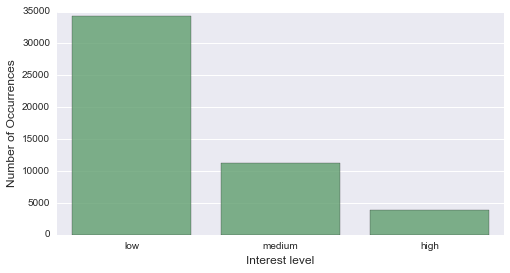

In [6]:
int_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

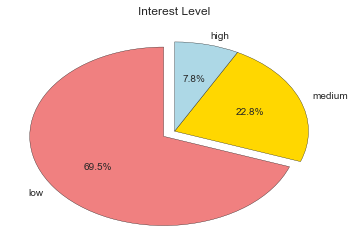

In [8]:
#target variable
labels = ["low","medium","high"]
sizes = train_df.interest_level.value_counts().values
explode=[0.1,0,0]
colors = ['lightcoral','gold','lightblue']
patches, texts,autotexts= plt.pie(sizes, labels=labels,colors=colors,explode=explode,autopct="%1.1f%%",
                        startangle=90)
plt.title("Interest Level")
plt.show()

Interest level is low for most of the cases followed by medium.

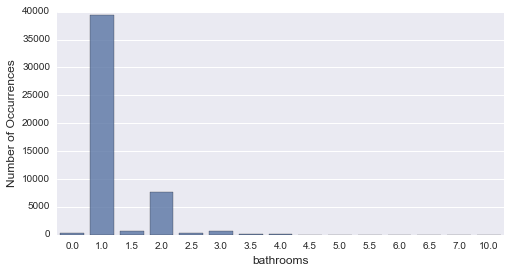

In [9]:
cnt_srs = train_df['bathrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

In [30]:
train_df.groupby('interest_level').bathrooms.value_counts()

interest_level  bathrooms
high            1.0           3413
                2.0            407
                3.0             18
                0.0              1
low             1.0          26581
                2.0           5566
                3.0            952
                1.5            605
                0.0            306
                2.5            274
medium          1.0           9428
                2.0           1687
                3.0             65
                1.5             40
                0.0              6
                2.5              3
dtype: int64

In [11]:
from sklearn.metrics import accuracy_score, log_loss

In [16]:
train_df["created"] = pd.to_datetime(train_df["created"])
train_df = train_df[train_df["latitude"] != 0]
train_df = train_df[train_df["longitude"] != 0]
features = ["bathrooms", "bedrooms", "latitude", "longitude", "price"]

In [17]:
X = train_df[features]
y = train_df["interest_level"]
X.head()

,bathrooms,bedrooms,latitude,longitude,price
10,1.5,3,40.7145,-73.9425,3000
10000,1.0,2,40.7947,-73.9667,5465
100004,1.0,1,40.7388,-74.0018,2850
100007,1.0,1,40.7539,-73.9677,3275
100013,1.0,4,40.8241,-73.9493,3350


In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1)

In [19]:
clf = RandomForestClassifier(n_estimators=2000)
clf.fit(X_train, y_train)
y_val_pred = clf.predict_proba(X_val)
log_loss(y_val, y_val_pred)

0.95579339404935049

In [65]:
clf = BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5)
clf.fit(X_train, y_train)
y_val_pred = clf.predict_proba(X_val)
log_loss(y_val, y_val_pred)

0.80789907097742264

In [20]:
clf = AdaBoostClassifier(n_estimators=2000)
clf.fit(X_train, y_train)
y_val_pred = clf.predict_proba(X_val)
log_loss(y_val, y_val_pred)

1.0978403368671374

In [21]:
clf = GradientBoostingClassifier(n_estimators=2000, learning_rate=1.0,
    max_depth=1, random_state=0).fit(X_train, y_train)
y_val_pred = clf.predict_proba(X_val)
log_loss(y_val, y_val_pred)

0.68926639444576865

In [23]:
submission = pd.DataFrame({
        "listing_id": X_val.index,
        "high": y_val_pred[:,0],
        "medium":y_val_pred[:,2],
        "low":y_val_pred[:,1]
    })
    
columnsTitles=["listing_id","high","medium","low"]
submission=submission.reindex(columns=columnsTitles)
submission.to_csv('submission.csv', index=False)